# Exercise
Objective: Implement a model predictive controller that automatically regulates vehicle velocity. Implement the controller in Excel, MATLAB, Python, or Simulink and tune the controller for acceptable performance. Discuss factors that may be important for evaluating controller performance. Estimated time: 1 hour

The dynamic relationship between a vehicle gas pedal position (MV) and velocity (CV) is given by the following set of conditions and a single dynamic equation.

[Link](https://apmonitor.com/do/index.php/Main/DynamicControl)

apm 10.32.114.116_gk_model21 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            0
   Equations    :            1
   Residuals    :            1
 
 Number of state variables:            360
 Number of total equations: -          320
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             40
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipo

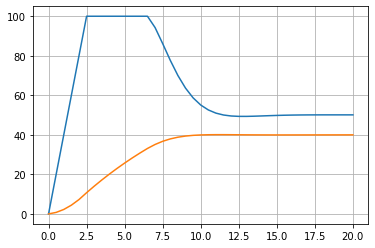

In [22]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

m = GEKKO()
m.time = np.linspace(0,20,41)

mass = 500

b = m.Param(50)
K = m.Param(.8)
p = m.MV(0,0,100)
v = m.CV()

m.Equation(mass * v.dt() == -v*b + K*b*p)

m.options.IMODE = 6 #for control

#manipulated variable (input) tuning
p.STATUS = 1 #allow optimizer to change
p.DCOST = 0.5## #smooth out gas pedal movement
p.DMAX = 20 #slow down change of gas pedal

#controlled variable (output) tuning
v.STATUS = 1 #add the SP to the objective
m.options.CV_TYPE = 2 #L2 norm
v.SP = 40 #set point
v.TR_INIT = 1 #setpoint trajectory
v.TAU = 2#time constant of setpoint trajectory. NOTE: this doesn't do a whole lot when tr_init is 0.
m.solve()

plt.plot(m.time, p, label = 'Pedal')
plt.plot(m.time, v, label='Velocity')
plt.grid(True)
plt.show()



## Tuning for Other Objectives

* minimize travel time

Well, to minimize travel time, you want to get to the set point as fast as you can. That means that you should allow inputs to change aggressively. I can also tell the reference trajectory to be faster with a higher time constant, and to maintain the set point trajectory (i.e. if it doesn't follow the trajectory, make up time). All of these together will likely lead to more bang bang control and input saturation. 

* remain within speed limits

To stay within speed limits, you can either set hard constraints on the controlled variable velocity to be within those bounds. You can also penalize the controlled variable from going too high. 

* improve vehicle fuel efficiency

To improve fuel efficiency, you want to change the control input the least amount as possible. So you need to penalize movement on the manipulated variable as well as smoothing out the reference trajectory to minimize accleration. 

* discourage excessive gas pedal adjustments

very similar to above. 

* do not accelerate excessively

similar to above. 